<a href="https://colab.research.google.com/github/Jung1016/python/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
tf.random.set_seed(3)

targetURL = 'https://raw.githubusercontent.com/Jung1016/python/main/heart_disease_classification_dataset.csv'

Data_set = pd.read_csv(targetURL, sep = ',')

Data_set

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [41]:
x = Data_set.iloc[:, 1:14]
y = Data_set.iloc[:,14]

x_d = pd.get_dummies(x)
y_d = pd.get_dummies(y)

x_d = x_d.fillna(x_d.mean())
x_d =  (x_d - x_d.mean())/x_d.std()

x_train, x_test, y_train, y_test = train_test_split(x_d.astype(np.float), y_d, test_size=0.1, shuffle = True)

x_d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
0,0.950624,1.969864,7.587772e-01,-0.256991,2.390484,-1.004171,0.005999,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,-0.679881,0.679881
1,-1.912150,1.000921,-9.778352e-02,0.071053,-0.416945,0.897478,1.659547,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,-0.679881,0.679881
2,-1.471723,0.031978,-9.778352e-02,-0.816596,-0.416945,-1.004171,0.989190,-0.69548,0.310399,0.974740,-0.713249,-0.512075,1.465992,-1.465992
3,0.179877,0.031978,-6.688240e-01,-0.199101,-0.416945,0.897478,1.257333,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,-0.679881,0.679881
4,0.289984,-0.936965,-1.622995e-15,2.077912,-0.416945,0.897478,0.586975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,1.465992,-1.465992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,-0.936965,4.732569e-01,-0.102618,-0.416945,0.897478,-1.200645,1.43311,-0.723126,-0.648041,-0.713249,1.121174,1.465992,-1.465992
299,-1.031296,1.969864,-1.239864e+00,0.341207,-0.416945,0.897478,-0.798430,-0.69548,0.138144,-0.648041,-0.713249,1.121174,-0.679881,0.679881
300,1.501157,-0.936965,7.016731e-01,-1.028860,2.390484,0.897478,-0.396216,-0.69548,2.032940,-0.648041,1.242538,1.121174,-0.679881,0.679881
301,0.289984,-0.936965,-1.622995e-15,-2.225257,-0.416945,0.897478,-1.558169,1.43311,0.138144,-0.648041,0.264644,1.121174,-0.679881,0.679881


In [42]:
x_d.isnull().sum().sort_values(ascending = False).head()

age         0
cp          0
trestbps    0
chol        0
fbs         0
dtype: int64

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 20)                300       
                                                                 
 dense_115 (Dense)           (None, 20)                420       
                                                                 
 dropout_38 (Dropout)        (None, 20)                0         
                                                                 
 dense_116 (Dense)           (None, 2)                 42        
                                                                 
Total params: 762
Trainable params: 762
Non-trainable params: 0
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.74209, saving model to ./data/model/hdc_model.hdf5

Epoch 2: val_loss improved from 0.74209 to 0.70458, saving model to ./data/model/hdc_model.hd

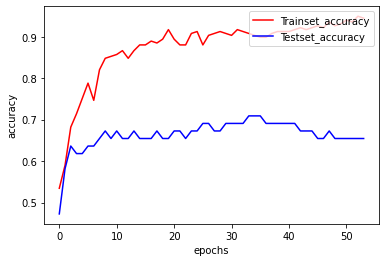

In [68]:
model = Sequential()
model.add(Dense(20, input_dim = 14, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 20)
modelpath = "./data/model/hdc_model.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=1, save_best_only = True)

history = model.fit(x_train, y_train, epochs = 500, batch_size = 10, validation_split = 0.2, verbose = 0, callbacks = [early_stopping_callback, checkpointer])

score = model.evaluate(x_test, y_test)
print("Test_accuracy: ", score[1])

history_DS = pd.DataFrame(history.history)
y_accuracy = history_DS['accuracy']
y_vaccuracy = history_DS['val_accuracy']

x_len = np.arange(len(y_accuracy))
plt.plot(x_len, y_accuracy, "-", c = "red", markersize = 3, label = 'Trainset_accuracy')
plt.plot(x_len, y_vaccuracy, "-", c = "blue", markersize = 3, label = 'Testset_accuracy')

plt.legend(loc = 'upper right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [77]:
#K-fold validation

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

k = 6

kfold = KFold(n_splits = k, shuffle = True)

acc_score = []

def model_fn():
  model = Sequential()
  model.add(Dense(20, input_dim = 14, activation = 'relu'))
  model.add(Dense(25, activation = 'relu'))
  model.add(Dense(2, activation = 'sigmoid'))
  return model

for train_index, test_index in kfold.split(x_d):
  xk_train, xk_test = x_d.iloc[train_index, :], x_d.iloc[test_index, :]
  yk_train, yk_test = y_d.iloc[train_index, :], y_d.iloc[test_index, :]

  model = model_fn()
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  history_k = model.fit(xk_train, yk_train, epochs = 200, batch_size = 7, verbose = 0)

  accuracy_k = model.evaluate(xk_test, yk_test)[1]
  acc_score.append(accuracy_k)

avg_acc_score = sum(acc_score)/k

print('정확도: ', acc_score)
print('정확도 평균: ', avg_acc_score)

2/2 [==============================] - 0s 5ms/step - loss: 1.1777 - accuracy: 0.8600
정확도:  [0.8823529481887817, 0.843137264251709, 0.7254902124404907, 0.7799999713897705, 0.800000011920929, 0.8600000143051147]
정확도 평균:  0.8151634037494659
